

https://colab.research.google.com/drive/1YyEYfccmFOBjp9kmpm3KF_hQeRj9ufow?usp=sharing



In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [ ]:
validation_data.rename(columns={'sentiment.polarity': 'sentiment_polarity', 'sentiment.subjectivity' : 'sentiment_subjectivity'},inplace=True)
test_data.rename(columns={'sentiment.polarity': 'sentiment_polarity', 'sentiment.subjectivity' : 'sentiment_subjectivity'},inplace=True)
train_data.rename(columns={'sentiment.polarity': 'sentiment_polarity', 'sentiment.subjectivity' : 'sentiment_subjectivity'},inplace=True)


In [ ]:
def create_label(x):
    if x == 'very positive':
      return 5 
    elif x == 'positive':
      return 4 
    elif x== 'neutral':
      return 3
    elif x== 'negative':
      return 2
    else:
      return 1

In [ ]:
validation_data['sentiment']=validation_data.sentiment_polarity.apply(create_label)
test_data['sentiment']=test_data.sentiment_polarity.apply(create_label)
train_data['sentiment']=train_data.sentiment_polarity.apply(create_label)

In [ ]:
train_data.columns

Index(['subreddit', 'title', 'id', 'url', 'author', 'body', 'majority_type',
       'is_first_post', 'post_depth', 'in_reply_to', 'sentiment_polarity',
       'sentiment_subjectivity', 'sentiment'],
      dtype='object')

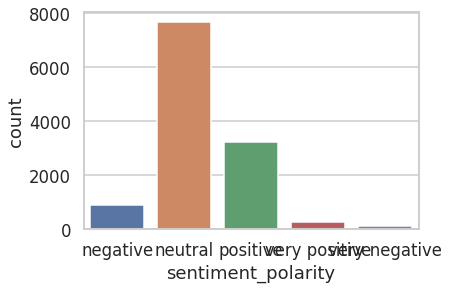

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(x='sentiment_polarity', data=train_data)

In [ ]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
#!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer()
train_features = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification on all subsets of our collection.
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

In [ ]:
train_labels = train_data['sentiment']
validation_labels = validation_data['sentiment']
test_labels = test_data['sentiment']

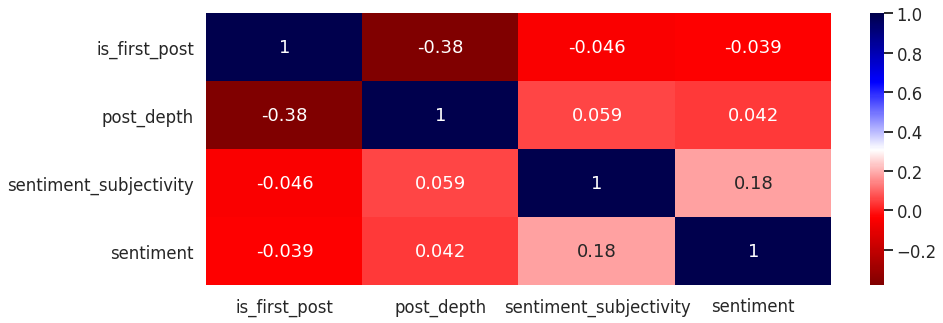

In [ ]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')
plt.figure(figsize = (14,5))
columns = ['subreddit','title','id','url','author','body','majority_type','is_first_post','post_depth','in_reply_to','sentiment_polarity','sentiment_subjectivity','sentiment']
sns.heatmap(train_data[columns].corr(), annot=True, cmap='seismic_r');

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [ ]:
def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average='macro')
  recall = recall_score(predictions, true_labels,average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels,1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f macro-F1=%0.3f" % (description,accuracy,precision,recall,f1))
  
  

**Dummy Classifier with stratergy = "most_frequent**

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier(strategy='most_frequent')
dummy_prior.fit(train_features, train_labels)
#evaluation_summary("Dummy_most_frequent_train", dummy_prior.predict(train_features), train_labels)
#evaluation_summary("Dummy_most_frequent_validation", dummy_prior.predict(validation_features), validation_labels)
evaluation_summary("Dummy_most_frequent_test", dummy_prior.predict(test_features), test_labels)

Evaluation for: Dummy_most_frequent_test
Classifier 'Dummy_most_frequent_test' has Acc=0.626 P=0.200 R=0.125 macro-F1=0.154


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Dummy Classifier with stratergy = "stratified"**

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels)
#evaluation_summary("Dummy_stratified_train", dummy_prior.predict(train_features), train_labels)
#evaluation_summary("Dummy_stratified_validation", dummy_prior.predict(validation_features), validation_labels)
evaluation_summary("Dummy_stratified_test", dummy_prior.predict(test_features), test_labels)

Evaluation for: Dummy_stratified_test
Classifier 'Dummy_stratified_test' has Acc=0.488 P=0.206 R=0.207 macro-F1=0.206


**LogisticRegression with one-hot vectorization**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(train_features, train_labels)
#evaluation_summary("LR_onehot_train", lr_model.predict(train_features), train_labels)
#evaluation_summary("LR_onehot_validation", lr_model.predict(validation_features), validation_labels)
evaluation_summary("LR_onehot_test", lr_model.predict(test_features), test_labels)

Evaluation for: LR_onehot_test
Classifier 'LR_onehot_test' has Acc=0.739 P=0.400 R=0.530 macro-F1=0.433


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**LogisticRegression with TF-IDF Vectorization(default settings)**

In [ ]:
## Logistic Regression with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = TfidfVectorizer()
train_features_new = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification on all subsets of our collection.
validation_features_new = one_hot_vectorizer.transform(validation_data['body'])
test_features_new = one_hot_vectorizer.transform(test_data['body'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model_new = lr.fit(train_features_new, train_labels)
#evaluation_summary("LR_TFIDF_train", lr_model_new.predict(train_features_new), train_labels)
#evaluation_summary("LR_TFIDF_validation", lr_model_new.predict(validation_features_new), validation_labels)
evaluation_summary("LR_TFIDF_test", lr_model_new.predict(test_features_new), test_labels)

Evaluation for: LR_TFIDF_test
Classifier 'LR_TFIDF_test' has Acc=0.739 P=0.325 R=0.578 macro-F1=0.349


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVC classifier with one-hot vectorization (SVM with RBF kernel, default settings)**

In [ ]:
from sklearn.svm import SVC
svc=SVC() #default kernal - 'rbf'
svc_model=svc.fit(train_features,train_labels)
#evaluation_summary("SVC_train", svc_model.predict(train_features), train_labels)
#evaluation_summary("SVC_validation", svc_model.predict(validation_features), validation_labels)
evaluation_summary("SVC_test", svc_model.predict(test_features), test_labels)

Evaluation for: SVC_test
Classifier 'SVC_test' has Acc=0.703 P=0.265 R=0.293 macro-F1=0.259


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest with Count Vectorizer**

In [ ]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Create our list of punchuationmarks
punctuations = string.punctuation

# Create our list of stop words
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vector
parser = English()
# Creating our tokenzer function
def spacy_tokenizer(sentence):
    """This function will accepts a sentence as input and processes the sentence into tokens, performing lemmatization, 
    lowercasing, removing stop words and punctuations."""
    
    # Creating our token object which is used to create documents with linguistic annotations
    mytokens = parser(sentence)
    
    # lemmatizing each token and converting each token in lower case
    # Note that spaCy uses '-PRON-' as lemma for all personal pronouns lkike me, I etc
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    
    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations]
    
    # Return preprocessed list of tokens
    return mytokens    

In [ ]:
# Custom transformer using spaCy
class predictors():
    def transform(self, X, **transform_params):
        """Override the transform method to clean text"""
        return [clean_text(text) for text in X]
    
    def fit(self, X, y= None, **fit_params):
        return self
    
    def get_params(self, deep= True):
        return {}

# Basic function to clean the text
def clean_text(text):
    """Removing spaces and converting the text into lowercase"""
    return text.strip().lower()

In [ ]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range = (1,1))

In [ ]:
# Logistic regression classifier
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier()
# Create pipeline using Bag of Words
pipe = Pipeline ([("cleaner", predictors()),
                 ("vectorizer", bow_vector),
                 ("classifier", classifier)])

# Model generation
pipe.fit(train_data['body'], train_labels)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f65278f4e50>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 t...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_im

In [ ]:
from sklearn import metrics

# Predicting with test dataset
predicted = pipe.predict(test_data['body'])
evaluation_summary("Random_forest_test",predicted, test_labels)

Evaluation for: Random_forest_test
Classifier 'Random_forest_test' has Acc=0.719 P=0.628 R=0.541 macro-F1=0.567


**Logistic Regression with TFIDF Hyperparameter tuning:**

**C parameter tuning with GridSearchCV**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression(class_weight='balanced')#to solve the imbalanced classes
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000],
    
  
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(validation_features_new , validation_labels)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. C=0.001, score=0.395, total=   0.2s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.421, total=   0.4s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ............................. C=0.001, score=0.444, total=   0.4s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.476, total=   0.2s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.417, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.415, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.447, total=   0.3s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.468, total=   0.5s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.534, total=   0.5s
[CV] C=0.01 ..........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished


Mean Accuracy: 0.681
Config: {'C': 100}


In [ ]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Mean Accuracy: 0.681
Config: {'C': 100}


**TFIDF Vectorizer tuning**

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('Lr', LogisticRegression(class_weight='balanced',C=100)),
])
parameters = {
    'tfidf__max_features': (None,50,500,5000,50000),
    'tfidf__sublinear_tf': [True, False]
    
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(validation_data['body'], validation_labels)

print("Best parameters set:")
grid_search_tune.best_estimator_.steps

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    9.0s finished


Best parameters set:


[('tfidf',
  TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.float64'>, encoding='utf-8',
                  input='content', lowercase=True, max_df=1.0, max_features=None,
                  min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                  smooth_idf=True,
                  stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                              'above', 'across', 'after', 'afterwards', 'again',
                              'against', 'all', 'almost', 'alone', 'along',
                              'already', 'also', 'although', 'always', 'am',
                              'among', 'amongst', 'amount', 'an', 'and',
                              'another', 'any', ...},
                  strip_accents=None, sublinear_tf=True,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                  vocabulary=None)),
 ('Lr', LogisticRegression(C=100, 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#updating the parameter of TFIDF vectorizer
one_hot_vectorizer = TfidfVectorizer(max_features=5000,sublinear_tf=True)
train_features_new = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification o all subsets of our collection.
validation_features_new = one_hot_vectorizer.transform(validation_data['body'])
test_features_new = one_hot_vectorizer.transform(test_data['body'])

**Logistic Regression Penalty tuning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression(C=100, class_weight='balanced')
LRparam_grid = {
   
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
  
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(validation_features_new , validation_labels)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... solver=newton-cg, score=0.651, total=   0.5s
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................... solver=newton-cg, score=0.670, total=   0.5s
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .................... solver=newton-cg, score=0.690, total=   0.5s
[CV] solver=newton-cg ................................................
[CV] .................... solver=newton-cg, score=0.685, total=   0.5s
[CV] solver=newton-cg ................................................
[CV] .................... solver=newton-cg, score=0.651, total=   0.5s
[CV] solver=lbfgs ....................................................
[CV] ........................ solver=lbfgs, score=0.654, total=   1.0s
[CV] solver=lbfgs ....................................................
[CV] ........................ solver=lbfgs, score=0.667, total=   1.0s
[CV] solver=lbfgs ....................................................
[CV] ........................ solver=lbfgs, score=0.693, total=   1.0s
[CV] solver=lbfgs ....................................................
[CV] ........................ solver=lbfgs, score=0.680, total=   1.1s
[CV] solver=lbfgs ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.5s finished


**Applying all the hyperparmeter tunings in Logistic Regression and evaluation of test data**

In [ ]:
tuned_classifier= LogisticRegression(class_weight='balanced',C=100,penalty='l2',solver='sag')

pipe = Pipeline ([("cleaner", predictors()),
                 ("vectorizer", one_hot_vectorizer),
                 ("classifier", tuned_classifier)])

In [ ]:
# Model generation
pipe.fit(validation_data['body'],validation_labels)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x7f6507d41490>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_wor...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=100, class_weight='balanced', dual=False,
                                    fit_intercept=True, 

In [ ]:
# Predicting with test dataset
predicted = pipe.predict(test_data['body'])
evaluation_summary("Tuned_model",predicted, test_labels)
print(classification_report(predicted, test_labels))
print(confusion_matrix(predicted, test_labels))

Evaluation for: Tuned_model
Classifier 'Tuned_model' has Acc=0.693 P=0.418 R=0.419 macro-F1=0.413
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.24      0.39      0.30       178
           3       0.80      0.76      0.78      2640
           4       0.60      0.62      0.61      1076
           5       0.44      0.33      0.38       116

    accuracy                           0.69      4016
   macro avg       0.42      0.42      0.41      4016
weighted avg       0.71      0.69      0.70      4016

[[   0    3    3    0    0]
 [   7   69   88   14    0]
 [  22  191 2014  391   22]
 [   2   16  369  663   26]
 [   1    3   40   34   38]]


**Adding features to the Pipeline to improve performance**

**Correlation Heatmap**

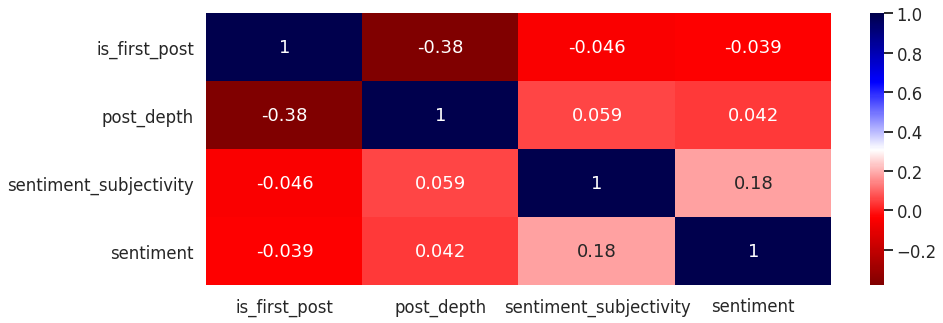

In [ ]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", context='talk')
plt.figure(figsize = (14,5))
columns = ['subreddit','title','id','url','author','body','majority_type','is_first_post','post_depth','in_reply_to','sentiment_polarity','sentiment_subjectivity','sentiment']
sns.heatmap(train_data[columns].corr(), annot=True, cmap='seismic_r');

**Plan 1: Adding a numerical feature to the pipeline**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
## All important step to set your transformers and vectorizers.
numeric_features = ['is_first_post']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

text_features = ['body']
text_transformer = TfidfVectorizer(sublinear_tf=True, norm='l2',max_features=5000, stop_words='english')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        
        ('tfidf_1', text_transformer, 'body')],
                    remainder='drop')
def evaluateClassifier(classif):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])

  clf.fit(train_data, train_data['sentiment'])

  y_pred = clf.predict(validation_data)
  

  print(metrics.classification_report(validation_data['sentiment'], y_pred, zero_division=0))
  print(confusion_matrix(validation_data['sentiment'], y_pred))
  print("Tuned model with added 'is_fist_post' num feature")
  print(metrics.classification_report(test_data['sentiment'], clf.predict(test_data), zero_division=0))
  print(confusion_matrix(test_data['sentiment'], clf.predict(test_data))) 

evaluateClassifier(LogisticRegression(C=100,solver='liblinear'))

              precision    recall  f1-score   support

           1       0.17      0.13      0.15        15
           2       0.46      0.37      0.41       215
           3       0.75      0.81      0.78      1961
           4       0.59      0.54      0.56       845
           5       0.53      0.26      0.35        73

    accuracy                           0.69      3109
   macro avg       0.50      0.42      0.45      3109
weighted avg       0.68      0.69      0.68      3109



NameError: ignored

**Plan 2: Adding subreddit categorical feature**

In [ ]:
categorical_features = ['subreddit']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[

         ('cat', categorical_transformer, categorical_features),
        
        ('tfidf_1', text_transformer, 'body')],
                    remainder='drop')

def evaluateClassifier(classif):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])

  clf.fit(train_data, train_data['sentiment'])

  y_pred = clf.predict(validation_data)
  

  print(metrics.classification_report(validation_data['sentiment'], y_pred, zero_division=0))
  print(confusion_matrix(validation_data['sentiment'], y_pred))
  print("Tuned model with added 'subreddit' cat feature")
  print(metrics.classification_report(test_data['sentiment'], clf.predict(test_data), zero_division=0))
  print(confusion_matrix(test_data['sentiment'], clf.predict(test_data))) 

evaluateClassifier(LogisticRegression(C=100,solver='liblinear'))

              precision    recall  f1-score   support

           1       0.18      0.13      0.15        15
           2       0.46      0.36      0.41       215
           3       0.75      0.80      0.77      1961
           4       0.57      0.53      0.55       845
           5       0.53      0.26      0.35        73

    accuracy                           0.68      3109
   macro avg       0.50      0.42      0.45      3109
weighted avg       0.67      0.68      0.67      3109

[[   2    2   10    1    0]
 [   0   78  124   13    0]
 [   8   77 1568  297   11]
 [   1   12  376  450    6]
 [   0    0   25   29   19]]
Tuned model with added 'subreddit' cat feature
              precision    recall  f1-score   support

           1       0.42      0.25      0.31        32
           2       0.41      0.32      0.36       282
           3       0.76      0.79      0.77      2514
           4       0.58      0.58      0.58      1102
           5       0.42      0.26      0.32        8

**Plan 3: Adding Post_depth as a feature**

In [ ]:
#ading post_depth to the pipeline
numeric_features = ['post_depth']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        
        ('tfidf_1', text_transformer, 'body')],
                    remainder='drop')

def evaluateClassifier(classif):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])

  clf.fit(train_data, train_data['sentiment'])

  y_pred = clf.predict(validation_data)
  

  print(metrics.classification_report(validation_data['sentiment'], y_pred, zero_division=0))
  print(confusion_matrix(validation_data['sentiment'], y_pred))
  print("Tuned model with added 'post_depth' num feature")
  print(metrics.classification_report(test_data['sentiment'], clf.predict(test_data), zero_division=0))
  print(confusion_matrix(test_data['sentiment'], clf.predict(test_data))) 

evaluateClassifier(LogisticRegression(C=100,solver='liblinear'))

              precision    recall  f1-score   support

           1       0.15      0.13      0.14        15
           2       0.46      0.37      0.41       215
           3       0.75      0.80      0.77      1961
           4       0.58      0.54      0.56       845
           5       0.54      0.26      0.35        73

    accuracy                           0.69      3109
   macro avg       0.50      0.42      0.45      3109
weighted avg       0.68      0.69      0.68      3109

[[   2    2   10    1    0]
 [   2   79  124   10    0]
 [   8   81 1573  289   10]
 [   1   11  370  457    6]
 [   0    0   26   28   19]]
Tuned model with added 'post_depth' num feature
              precision    recall  f1-score   support

           1       0.50      0.28      0.36        32
           2       0.43      0.31      0.36       282
           3       0.76      0.80      0.78      2514
           4       0.59      0.59      0.59      1102
           5       0.42      0.27      0.33        

**Plan 4: Adding majority_type as a categorical feature**

In [ ]:
categorical_features = ['majority_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[

         ('cat', categorical_transformer, categorical_features),
        
        ('tfidf_1', text_transformer, 'body')],
                    remainder='drop')

def evaluateClassifier(classif):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])

  clf.fit(train_data, train_data['sentiment'])

  y_pred = clf.predict(validation_data)
  

  print(metrics.classification_report(validation_data['sentiment'], y_pred, zero_division=0))
  print(confusion_matrix(validation_data['sentiment'], y_pred))
  print("Tuned model with added 'majority_type' cat feature")
  print(metrics.classification_report(test_data['sentiment'], clf.predict(test_data), zero_division=0))
  print(confusion_matrix(test_data['sentiment'], clf.predict(test_data))) 

evaluateClassifier(LogisticRegression(C=100,solver='liblinear'))

              precision    recall  f1-score   support

           1       0.15      0.13      0.14        15
           2       0.45      0.36      0.40       215
           3       0.75      0.80      0.78      1961
           4       0.59      0.55      0.57       845
           5       0.54      0.29      0.38        73

    accuracy                           0.69      3109
   macro avg       0.50      0.43      0.45      3109
weighted avg       0.68      0.69      0.68      3109

[[   2    2   10    1    0]
 [   1   78  125   11    0]
 [   9   83 1578  279   12]
 [   1   11  365  462    6]
 [   0    0   22   30   21]]
Tuned model with added 'majority_type' cat feature
              precision    recall  f1-score   support

           1       0.45      0.28      0.35        32
           2       0.44      0.32      0.37       282
           3       0.76      0.80      0.78      2514
           4       0.59      0.59      0.59      1102
           5       0.43      0.27      0.33     

**Final fine tuning the parameters using Grid search with added features**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
## Tune parameters with grid search.
def tune(classif):

  params = {
      'preprocessor__tfidf_1__max_features' : (None,5,50,500,5000,50000),
      'preprocessor__tfidf_1__sublinear_tf' : (True, False),
      
      
      

  }
  
  pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])
  
  grid_search = GridSearchCV(pipe, verbose=1, param_grid=params, n_jobs=-1, scoring='f1_macro', cv=2 )
  print("Performing grid search...")
  print("pipeline:", [name for name, _ in pipe.steps])
  print("parameters:")
  print(params)

  grid_search.fit(train_data, train_data['sentiment'])


  print("Best score: %0.3f" % grid_search.best_score_)
  print("Best parameters set:")
  best_parameters = grid_search.best_estimator_.get_params()
  for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

tune(LogisticRegression())

Performing grid search...
pipeline: ['preprocessor', 'classifier']
parameters:
{'preprocessor__tfidf_1__max_features': (None, 5, 50, 500, 5000, 50000), 'preprocessor__tfidf_1__sublinear_tf': (True, False)}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   24.6s finished


Best score: 0.345
Best parameters set:
	preprocessor__tfidf_1__max_features: 500
	preprocessor__tfidf_1__sublinear_tf: False


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
text_transformer1 = TfidfVectorizer(sublinear_tf=False, max_features=500, stop_words='english')

In [ ]:
#ading post_depth to the pipeline
numeric_features = ['is_first_post']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['majority_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('tfidf_1', text_transformer1, 'body'),
        ],
                    remainder='drop')




In [ ]:

def evaluateClassifier(classif):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])

  clf.fit(train_data, train_data['sentiment'])

  y_pred = clf.predict(validation_data)
  print("Tuned model with added added feature")
  print("Validation set results")
  

  print(metrics.classification_report(validation_data['sentiment'], y_pred, zero_division=0))
  print(confusion_matrix(validation_data['sentiment'], y_pred))
  print("Test set results")
  print(metrics.classification_report(test_data['sentiment'], clf.predict(test_data), zero_division=0))
  print(confusion_matrix(test_data['sentiment'], clf.predict(test_data))) 

LogisticRegression(C=100,solver='liblinear',class_weight='balanced')

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluateClassifier(LogisticRegression(C=100,solver='liblinear',class_weight='balanced'))

Tuned model with added added feature
Validation set results
              precision    recall  f1-score   support

           1       0.03      0.20      0.05        15
           2       0.31      0.40      0.35       215
           3       0.76      0.72      0.74      1961
           4       0.61      0.55      0.58       845
           5       0.30      0.47      0.36        73

    accuracy                           0.64      3109
   macro avg       0.40      0.47      0.42      3109
weighted avg       0.68      0.64      0.66      3109

[[   3    3    8    1    0]
 [  15   86   96   11    7]
 [  73  160 1411  270   47]
 [  15   31  311  462   26]
 [   1    1   21   16   34]]
Test set results
              precision    recall  f1-score   support

           1       0.07      0.31      0.11        32
           2       0.30      0.33      0.31       282
           3       0.77      0.73      0.75      2514
           4       0.64      0.57      0.60      1102
           5       0.1

In [ ]:
#bar chart
import pandas as pd
F1_score=[['Dummy_most_frequent', 0.154],['Dummy_stratified', 0.205],['Logistic Regression with onehot', 0.349],['Logistic regression with TFIDF', 0.350],['Support Vector machine',0.331],['Random Forest',0.567]]

bar_df=pd.DataFrame(F1_score, columns=['Classifier','macro F1 score'])
bar_df

,Classifier,macro F1 score
0,Dummy_most_frequent,0.154
1,Dummy_stratified,0.205
2,Logistic Regression with onehot,0.349
3,Logistic regression with TFIDF,0.350
4,Support Vector machine,0.331
5,Random Forest,0.567


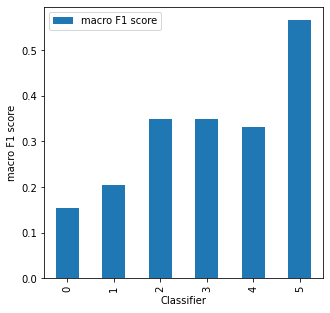

In [ ]:
import matplotlib.pyplot as plt
ax=bar_df[['Classifier','macro F1 score']].plot(kind='bar',figsize=(5,5))
#ax.set_xlabel("Classifier")
ax.set_ylabel("macro F1 score")
plt.xlabel("Classifier")
plt.show()

In [ ]:
#score table
scores=[['Dummy_most_frequent', 0.626,0.200,0.125,0.154],['Dummy_stratified',0.470,0.206,0.205,0.205],['Logistic Regression with onehot',0.739,0.325,0.578,0.349],['Logistic regression with TFIDF',0.739,0.325,0.578,0.350],['Support Vector machine',0.744,0.313,0.622,0.331],['Random Forest',0.717,0.630,0.538,0.567]]

bar_dff=pd.DataFrame(scores, columns=['Classifier','Accuracy','Precision','Recall','macro F1 score'])
bar_dff

,Classifier,Accuracy,Precision,Recall,macro F1 score
0,Dummy_most_frequent,0.626,0.200,0.125,0.154
1,Dummy_stratified,0.470,0.206,0.205,0.205
2,Logistic Regression with onehot,0.739,0.325,0.578,0.349
3,Logistic regression with TFIDF,0.739,0.325,0.578,0.350
4,Support Vector machine,0.744,0.313,0.622,0.331
5,Random Forest,0.717,0.630,0.538,0.567
